# Test 4 solution
## Question 2

### 1.- Item (a)

Since use look for the nearest neighbor (i.e. K = 1) for each point of the training set over the same training set, we have that the nearest neighbor for each one is itself, and thus, we get an error rate of 0%. Then, as training and test sets are equally-sized,

$$ \dfrac{0 + TestER}{2} = 18\%; $$

hence,

$$ TestER = 36\%, $$

where $TestER$ stands for Test error rate. Finally, based on these results:

|Classification|Test error rate|
|:-----:|:-----:|
|logistic regression|30%|
|knn ($K = 1$)|36%|

we should prefer to use for classification of new observations: **logistic regression** because it has a **lower test error rate**.

### 2.- Items (b) and (c): the curse of dimensionality

In [1]:
# Common imports
import numpy as np

# To plot pretty figures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Basic functions

def distance(a, b):
    return np.linalg.norm(np.array(a)-np.array(b))

def random_point(dim):
    return [np.random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

dimensions = range(1,101)
avg_distances = []
min_distances = []

# to make this notebook's output stable across runs
np.random.seed(17)

for dim in dimensions:
    distances = random_distances(dim, 10000)
    avg_distances.append(np.mean(distances))    
    min_distances.append(np.min(distances)) 

Text(0.5, 1.0, 'Figure 1: 10 000 random distances')

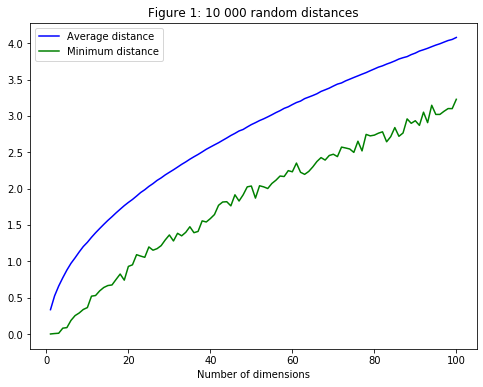

In [3]:
plt.figure(figsize=(8,6))
plt.plot(dimensions, avg_distances, 'b', label='Average distance')
plt.plot(dimensions, min_distances, 'g', label='Minimum distance')
plt.xlabel('Number of dimensions')
plt.legend()
plt.title('Figure 1: 10 000 random distances')

**Comment 1**: From figure 1 we see that for 10 000 random distances in a d-dimensional unit cube the average distance increases as d increases; Moreover, the minimum distance has a non-monotonic behavior with respect to d, but it has a tendency to increase as d increases.

Text(0.5, 1.0, 'Figure 2: minimum distance / average distance')

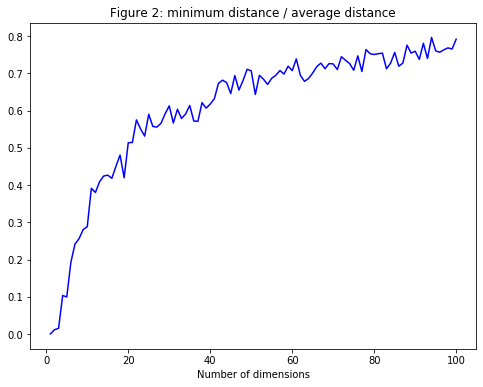

In [4]:
plt.figure(figsize=(8,6))
plt.plot(dimensions, np.array(min_distances)/np.array(avg_distances), 'b', label='average distance')
plt.xlabel('Number of dimensions')
plt.title('Figure 2: minimum distance / average distance')

**Comment 2**: From figure 2 we see that for the same random distances above the quotient between minimum distance and averge distance has a non-monotonic behavior (thanks to the minimum distance one) with respect to d; however, it has a tendency to increase as d increases. Furthermore, and what is the most remarkable, it looks that this quotient has limit one as d tends to infinity. 

Therefore, we can say: as the simension increases, it is likely that the nearest points tend to be not so near as the averge distance. It other words, notion of closeness could be distorted.

Text(0.5, 1.0, 'Figure 3: fifty random points in one dimension')

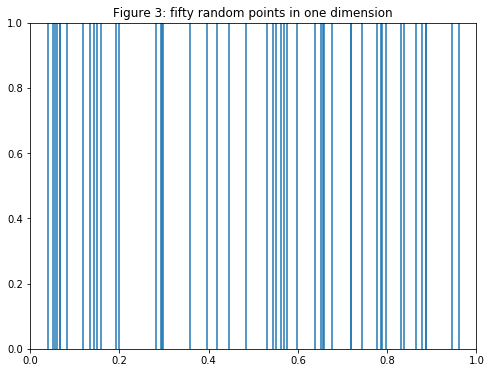

In [5]:
np.random.seed(17)
plt.figure(figsize=(8,6))
for _ in range(50):
    plt.axvline(np.random.random())    
plt.title('Figure 3: fifty random points in one dimension')

Text(0.5, 1.0, 'Figure 4: fifty random points in two dimensions')

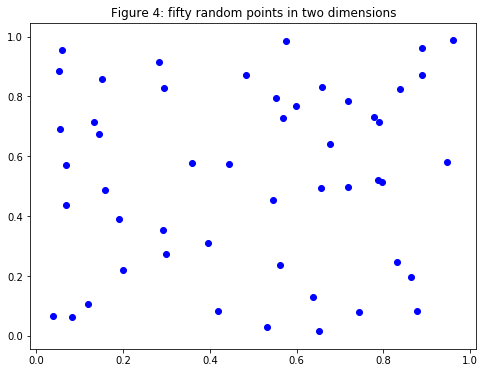

In [6]:
np.random.seed(17)
plt.figure(figsize=(8,6))
plt.scatter(np.random.random(50), np.random.random(50), c='b')
plt.title('Figure 4: fifty random points in two dimensions')

Text(0.5, 0.92, 'Figure 5: fifty random points in three dimensions')

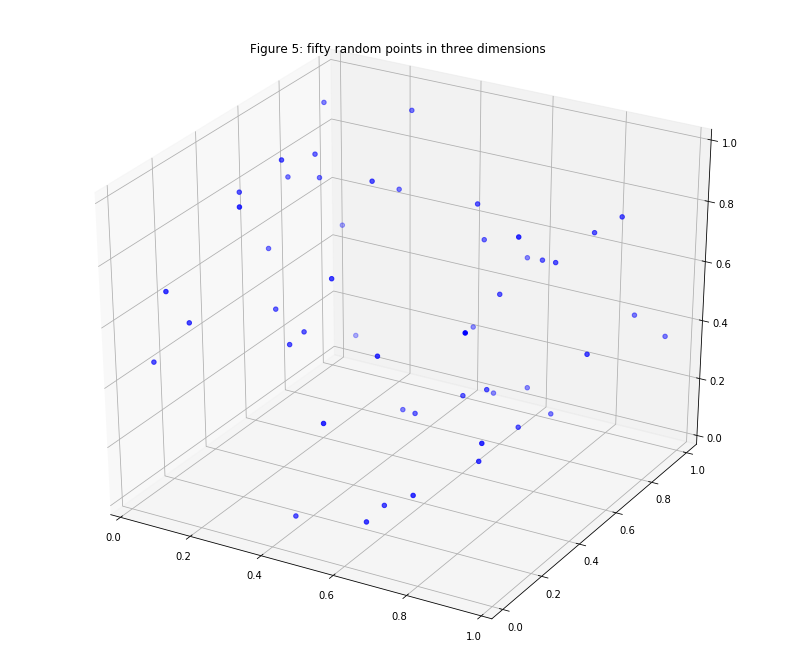

In [7]:
np.random.seed(17)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.random.random(50), np.random.random(50), np.random.random(50), c='b')
ax.set_title('Figure 5: fifty random points in three dimensions')

**Comment 3**: From figures 3, 4 and 5 we can think about the *curse of dimensionalty* as the lack of density as dimension increases since there are more space when dimension is higher. Therefore, it would be a good idea to make a dimsion reduction in order to apply KNN if our dimension is high.